In [ ]:
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def BLScall(S,K,T,r,vol):
  d1 = (math.log(S/K)+(r+vol*vol/2)*T)/(vol*math.sqrt(T))
  d2 = d1-vol*math.sqrt(T)
  call = S*norm.cdf(d1)-K*math.exp(-r*T)*norm.cdf(d2)
  return call

In [ ]:
S = 26196.73
K = 26400
T = 21/365
r = 0.01785
vol = 0.17473994
print(BLScall(S,K,T,r,vol))

357.0000033924698


In [ ]:
def BisectionBLS(S,K,T,r,call):
  left = 0.0000001
  right = 1
  while(right-left>0.0000000001):
    mid = (left+right)/2
    if (BLScall(S,K,T,r,left)-call)*(BLScall(S,K,T,r,mid)-call) < 0:
      right = mid
    else:
      left = mid
  return (left+right)/2

In [ ]:
print(BisectionBLS(S,K,T,r,357))

0.17473993865343107


In [ ]:
def MCsim(S,T,r,vol,N,M):
  dt = T/N
  St = np.zeros((M,N+1))
  St[:,0] = S
  for i in range(N):
    St[:,i+1] = np.multiply(St[:,i],np.exp((r-0.5*vol*vol)*dt+vol*np.random.normal(0,1,(M,))*math.sqrt(dt)))
  return St

In [ ]:
vol = BisectionBLS(S,K,T,r,357)
St = MCsim(S,T,r,vol,21,10000)
call = np.mean(np.maximum(St[:,-1]-K,0))*math.exp(-r*T)
print(call)

354.9799959953684


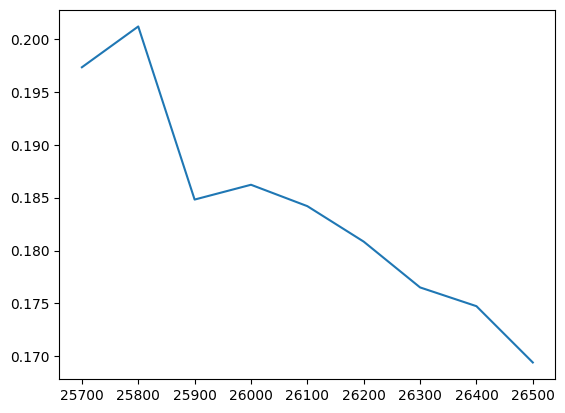

In [ ]:
price = [25700, 25800, 25900,26000,26100,26200,26300,26400,26500]
call = [795,740,640,585,525,465,406,357,303,259]

# x 履約
# y iv
result = []
for i in range(len(price)):
  # print(BisectionBLS(S,price[i],T,r,call[i]))
  result.append(BisectionBLS(S,price[i],T,r,call[i]))
plt.plot(price,result)
plt.show()

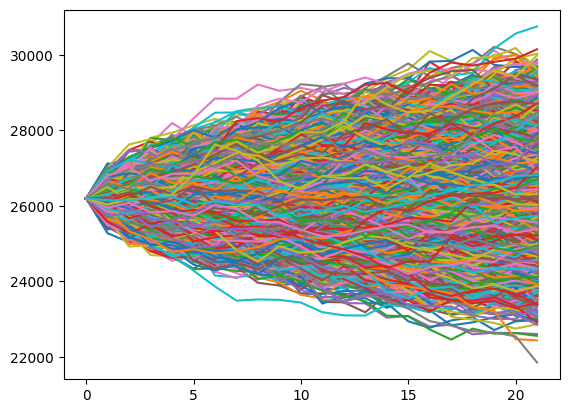

In [ ]:
plt.plot(St.transpose())
plt.show()

In [ ]:
def MCsim(S,T,r,vol,N,M):
  dt = T/N
  increments = np.exp((r - 0.5*vol**2)*dt
                    + vol*np.random.normal(0, 1, (M, N))*np.sqrt(dt))
  St = np.concatenate(
        [S*np.ones((M, 1)), S * np.multiply.accumulate(increments, axis=1)],
        axis=1
    )
  return St

In [ ]:
vol = BisectionBLS(S,K,T,r,357)
St = MCsim(S,T,r,vol,21,10000)
call = np.mean(np.maximum(St[:,-1]-K,0))*math.exp(-r*T)
print(call)

354.6539616990421
